In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from utils.helper import split_data, evaluate_regressor,load_and_summarize

In [26]:
df_housing = load_and_summarize('CSV Files/processed_housing_data.csv')

--- Loading processed_housing_data.csv ---
First 5 rows:
      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667       1.0        0.0   
1  0.909091  0.502405       0.6   1.000000  1.000000       1.0        0.0   
2  0.909091  0.571134       0.4   0.333333  0.333333       1.0        0.0   
3  0.906061  0.402062       0.6   0.333333  0.333333       1.0        0.0   
4  0.836364  0.396564       0.6   0.000000  0.333333       1.0        1.0   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0       0.0              0.0              1.0  0.666667       1.0   
1       0.0              0.0              1.0  1.000000       0.0   
2       1.0              0.0              0.0  0.666667       1.0   
3       1.0              0.0              1.0  1.000000       1.0   
4       1.0              0.0              1.0  0.666667       0.0   

   furnishingstatus  
0               1.0  
1               1.0  

In [27]:
X_train, X_test, y_train, y_test = split_data(df_housing, 'price')

In [28]:
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = multi_reg.predict(X_test)
print("\n--- Model Performance ---")
evaluate_regressor(y_test,y_pred, model_name="Multiple Linear Regression")


--- Model Performance ---
MSE for Multiple Linear Regression: 0.0133


In [30]:
print("\n--- Interpreting the Model ---")
coeffs = pd.DataFrame(multi_reg.coef_, X_train.columns, columns=['Coefficient'])
print("The coefficients show the impact of each feature on the price:")
print(coeffs.sort_values('Coefficient', ascending=False))


--- Interpreting the Model ---
The coefficients show the impact of each feature on the price:
                  Coefficient
area                 0.297108
bathrooms            0.284966
stories              0.105513
airconditioning      0.068013
hotwaterheating      0.059557
parking              0.058638
prefarea             0.054537
furnishingstatus     0.036432
basement             0.034040
bedrooms             0.034015
mainroad             0.031760
guestroom            0.020186


In [ ]:
sns.set_style('whitegrid')


Generating Plot 1: Actual vs. Predicted Prices...


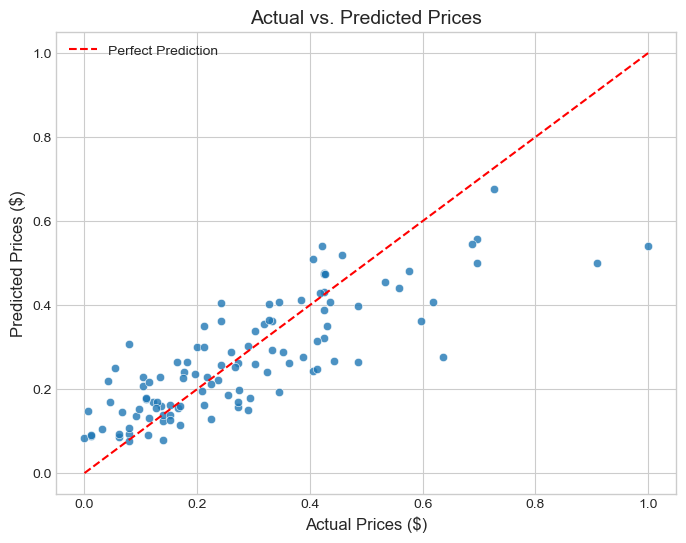

In [31]:
print("\nGenerating Plot 1: Actual vs. Predicted Prices...")
plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.8)

lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', label='Perfect Prediction')

plt.title('Actual vs. Predicted Prices', fontsize=14)
plt.xlabel('Actual Prices ($)', fontsize=12)
plt.ylabel('Predicted Prices ($)', fontsize=12)
plt.legend()

plt.show()

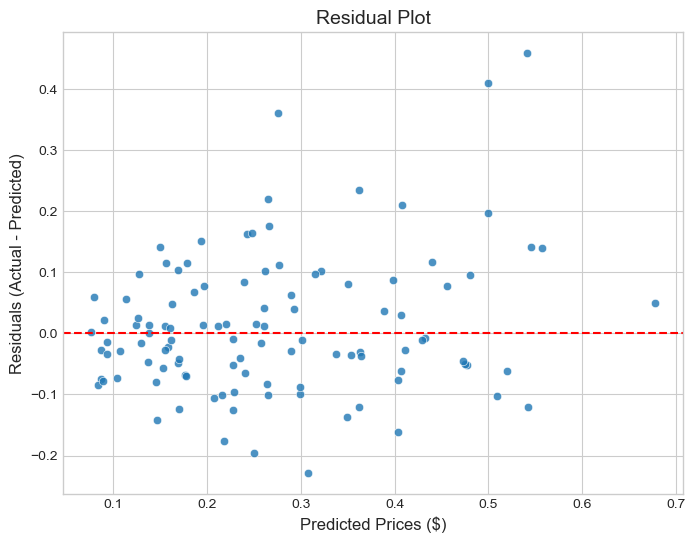

In [32]:
# --- Visualization 2: Residual Plot ---

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Predicted Prices ($)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)

plt.show()